In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv('data_spfinal',index_col='Date', parse_dates=True)
df.shape

(300, 503)

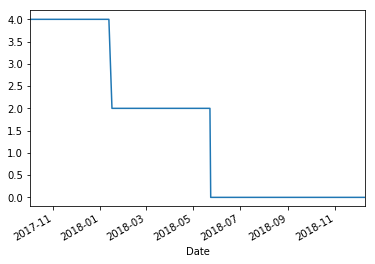

In [12]:
df.isna().sum(1).plot()

In [10]:
df_ret = df.pct_change().dropna(how='any', axis=0)
#df_ret.corr().replace(1, 0).stack().hist(bins=100)
df_ret.shape

(137, 503)

In [4]:
df_ret.shape

(137, 503)

In [23]:
df_ret.to_csv("ret_spfinal.csv")

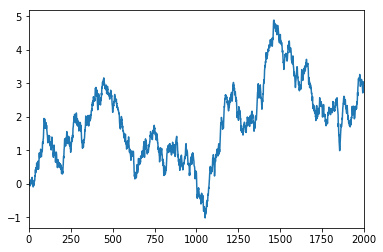

In [161]:
#np.random.seed(1)

mu, sigma = 0.0, 0.3 # mean and standard deviation
n_universe = 10
t_window = 2000
df_ret = pd.DataFrame(np.random.normal(mu, sigma, size=(t_window,n_universe)))
df_ret = df_ret.sub(df_ret.median(1), 0)

#df_ret.cumsum().plot()

df_pred = pd.DataFrame(np.random.binomial(n=1, p=0.5, size=(t_window, n_universe)))
df_pos = 2 * df_pred  - 1
df_pos = df_pos.div(df_pos.abs().sum(1), 0)

pnl = df_pos.shift(1).mul(df_ret, 0).sum(1)
pnl.cumsum().plot()

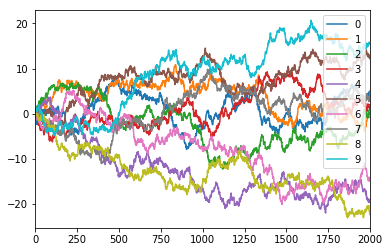

In [162]:
df_ret.cumsum().plot()

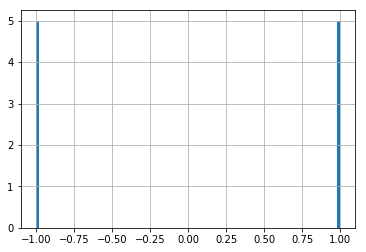

In [163]:
np.sign(df_ret).iloc[0].hist(bins=100)

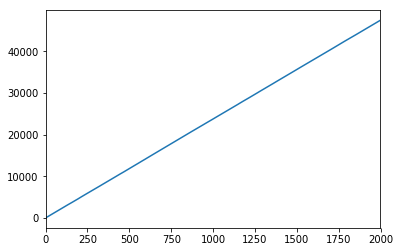

In [106]:
df_target = np.sign(df_ret).shift(-1) # we have access to tomorrow's return
pnl = df_target.shift(1).mul(df_ret, 0).sum(1)
pnl.cumsum().plot()
y_target = df_target.stack()

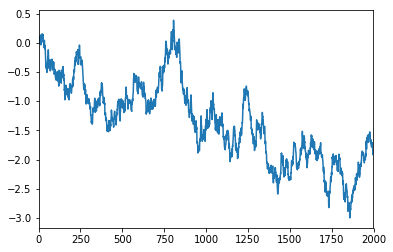

In [164]:
df_pos = pd.DataFrame(np.ones((t_window, n_universe))) # long all the stocks
df_pos = df_pos.div(df_pos.abs().sum(1))
pnl = df_pos.shift(1).mul(df_ret, 0).sum(1)
pnl.cumsum().plot()

In [165]:
# test: accuracy on a given day
v = []
for i in range(1):
    df_pred = 2 * pd.DataFrame(np.random.binomial(n=1, p=0.5, size=(t_window, n_universe))) - 1
    y_pred = df_pred.iloc[0].values
    y_target = df_target.iloc[0].values
    accuracy_score(y_target, y_pred)
    v.append(accuracy_score(y_target, y_pred))
accuracy_score(y_target, y_pred) 
#plt.hist(np.array(v), bins=100);

ValueError: Found input variables with inconsistent numbers of samples: [100, 10]

In [160]:
# test: overall accuracy
df_pred = 2 * pd.DataFrame(np.random.binomial(n=1, p=0.5, size=(t_window, n_universe))) - 1
y_target = df_target.stack()
y_pred = df_pred.stack().reindex_like(y_target)
accuracy_score(y_target, y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

0.5003151575787894
SR:  -0.005188435741157029
BIAS:  -0.09785728550897295
VOL 0.4747810473783656


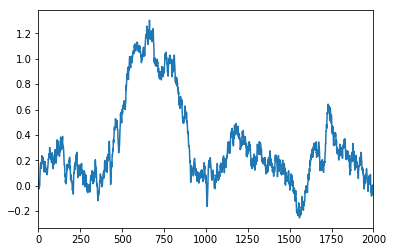

In [139]:
acc_level = 0.5
df_pred = np.sign(df_ret.shift(-1).copy())
df_ind = pd.DataFrame(np.random.binomial(n=1, p=acc_level, size=(t_window-1, n_universe)))
df_pred[df_ind.eq(0)] = - np.sign(df_ret.shift(-1))

y_pred = df_pred.stack()
print(accuracy_score(y_target, y_pred))


df_pos = df_pred.div(df_pred.abs().sum(1))
pnl = df_pos.shift(1).mul(df_ret, 0).sum(1)
pnl.cumsum().plot()

print("SR: ", pnl.mean() / pnl.std() * 15.87)
print("BIAS: ", (pnl.sum() / df_pos.fillna(0).abs().sum(1).sum()) * 10**4)
print("VOL", pnl.std() * 15.87)

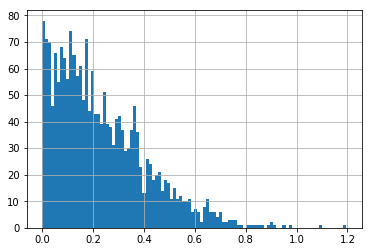

In [140]:
# distirbution of level/intensity for a given stock
df_ret.iloc[:,0].abs().hist(bins=100)

SR:  0.06007919536721763
BIAS:  2.4555757376201703
VOL 1.0288827311476099


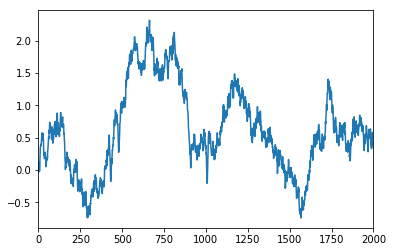

In [142]:
# ideal situation: we have acces to tommorro returns
df_target_level = df_ret.abs().shift(-1)
df_pred_aug = df_pred.mul(df_target_level, 0)
#df_pred_aug = df_pred.div(df_target_level, 0)

df_pos = df_pred_aug.div(df_pred_aug.abs().sum(1), 0)
pnl = df_pos.shift(1).mul(df_ret, 0).sum(1)
pnl.cumsum().plot()
sr = pnl.mean() / pnl.std() * 15.87

print("SR: ", sr)
print("BIAS: ", (pnl.sum() / df_pos.fillna(0).abs().sum(1).sum()) * 10**4)
print("VOL", pnl.std() * 15.87)

In [144]:
df_ret.cov()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.085886,-0.001538,-0.000781,-0.002085,-0.002221,0.001772,0.003048,-0.001055,-0.000491,-0.001114,...,0.001560,0.000086,-0.003261,-0.000199,0.000137,0.000837,-0.001406,-0.000538,-0.001659,0.000624
1,-0.001538,0.091183,-0.001222,-0.003167,0.001192,0.003541,-0.000048,-0.004371,-0.000908,-0.003561,...,-0.001537,-0.001436,0.001412,0.004042,-0.001474,-0.005322,0.000010,-0.001088,-0.001170,0.001427
2,-0.000781,-0.001222,0.091721,0.000456,-0.002306,0.001448,-0.004972,0.000818,-0.001080,0.000273,...,-0.002019,-0.000893,-0.001303,-0.001059,-0.001630,0.000556,-0.003490,-0.003807,-0.003695,0.001611
3,-0.002085,-0.003167,0.000456,0.090963,0.000239,0.002300,0.003194,-0.001533,-0.000112,-0.005142,...,-0.000192,-0.001809,-0.000505,0.001000,-0.000082,-0.001259,0.001043,-0.000087,-0.002708,0.003261
4,-0.002221,0.001192,-0.002306,0.000239,0.089938,-0.003637,-0.002749,-0.000534,-0.000022,-0.000970,...,0.000947,-0.002927,-0.002624,-0.001615,-0.001338,-0.000630,0.001140,-0.000167,0.000704,0.001097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000837,-0.005322,0.000556,-0.001259,-0.000630,-0.000656,0.000287,0.000496,-0.000963,0.002016,...,-0.004562,0.001332,0.000116,-0.000665,0.002672,0.087400,0.000973,-0.000058,0.001693,-0.000605
96,-0.001406,0.000010,-0.003490,0.001043,0.001140,-0.001918,-0.000581,0.001787,-0.000028,-0.004898,...,-0.000695,0.002937,0.001058,-0.001717,0.001073,0.000973,0.087414,-0.001094,0.000164,0.001500
97,-0.000538,-0.001088,-0.003807,-0.000087,-0.000167,0.000083,0.001254,-0.001220,-0.000489,-0.001340,...,0.001425,0.000533,0.001753,0.000589,-0.002276,-0.000058,-0.001094,0.088813,0.004819,0.002602
98,-0.001659,-0.001170,-0.003695,-0.002708,0.000704,-0.001581,0.001976,0.001550,0.003440,0.000442,...,-0.001122,0.000403,0.001015,-0.001693,0.000836,0.001693,0.000164,0.004819,0.087509,-0.000369


In [79]:
df_pos

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.007562,-0.009236,-0.016671,-0.026089,0.008651,0.019407,0.009529,-0.001070,-0.005259,-0.010980,...,-0.019357,-0.009305,-0.007746,0.018210,-0.007941,0.005673,0.014763,-0.008366,-0.011993,0.003187
1,-0.003142,-0.007298,0.020975,-0.009219,-0.006059,-0.004914,0.017747,0.005826,0.012828,-0.004274,...,-0.010913,0.010550,-0.000150,0.018575,-0.014268,0.001633,0.015135,-0.001486,-0.005252,-0.009988
2,-0.008318,-0.003354,-0.008670,0.010268,-0.012816,-0.015428,0.006695,0.003750,0.019862,0.000349,...,-0.010438,0.006138,-0.025435,0.006853,0.017757,0.007612,-0.013744,-0.004216,-0.016316,-0.026682
3,0.019200,-0.000713,0.009909,0.008088,-0.011097,0.012328,-0.015859,-0.015442,-0.004990,0.011376,...,0.002908,0.010370,0.005630,0.004422,0.024520,-0.019952,0.025378,0.008444,-0.003480,-0.001116
4,-0.005638,0.007446,0.000446,0.000090,-0.007319,0.017982,0.011016,0.002392,0.010247,0.012083,...,0.002270,-0.022973,0.004814,-0.011355,0.000349,-0.009562,0.017841,-0.022581,-0.014097,-0.010016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.006866,-0.006889,0.019541,-0.020729,0.004956,-0.004336,0.011235,0.006793,0.022951,0.006320,...,0.003551,-0.001746,0.009583,-0.008181,0.022256,0.001990,-0.014562,-0.005141,-0.006014,0.000280
1996,0.004951,0.012421,-0.000779,-0.008126,0.011285,-0.011017,0.011096,-0.017478,-0.003532,-0.006112,...,-0.011119,0.002902,0.028195,-0.007350,-0.003989,-0.001265,-0.014635,0.010348,0.012079,0.023458
1997,-0.014625,-0.008519,0.012999,-0.018307,0.000313,-0.001255,0.004880,0.003266,-0.010306,-0.000700,...,-0.005155,0.000804,-0.012275,0.008223,-0.011823,0.034753,-0.002404,0.028632,0.000317,0.002910
1998,0.007819,-0.012794,0.006310,-0.000803,0.019661,-0.007554,-0.027086,0.006775,0.000625,0.009763,...,0.011917,0.024826,-0.006316,-0.000351,-0.000462,-0.000585,-0.010338,0.002301,-0.000769,0.020393
